In [1]:
!pip install pandas scikit-learn matplotlib

  Using cached pandas-2.3.2-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.2-cp310-cp310-win_amd64.whl (11.3 MB)
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------- ----------------------- 3.7/8.9 MB 21.7 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 27.6 MB/s  0:00:00
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/6 [pytz]
   ---------------------------------------- 0/6 [pytz]
   ------ --------------------------------- 1/6 [tzdata]
   ------ --------------------------------- 1/6 [tzdata]
   ------ --------------------------------- 1/6 [tzdata]
   ------ --------------------------------- 1/6 [tzdata]
   -------------------- ------------------- 3/6 [joblib]
   ---

### 데이터 확인

In [1]:
import pandas as pd

In [2]:
# CSV 파일 경로를 여러분의 파일 경로로 수정해주세요.
file_path = './data/한국전력공사_공동주택 전력·기상 융합데이터_2022.csv'
df = pd.read_csv(file_path, encoding='utf-8')

# 데이터의 처음 5줄을 출력하여 잘 불러왔는지 확인
df.head()

,X격자,Y격자,위도,경도,연도,월,일,시,계약전력합계,공동주택수,전력부하합계,기온,상대습도,풍속
0,86,68,34.84357,128.398978,2022,1,1,1,11850,18,1728.52,-1.5,31.0,1.7
1,86,68,34.84357,128.398978,2022,1,1,2,11850,18,1568.96,-1.2,31.0,1.7
2,86,68,34.84357,128.398978,2022,1,1,3,11850,18,1431.84,-1.6,32.0,2.5
3,86,68,34.84357,128.398978,2022,1,1,4,11850,18,1503.36,-2.3,33.0,2.3
4,86,68,34.84357,128.398978,2022,1,1,5,11850,18,1490.96,-1.9,35.0,3.0


In [3]:
# 데이터의 정보 확인 (컬럼 이름, 데이터 타입 등)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338920 entries, 0 to 2338919
Data columns (total 14 columns):
 #   Column  Dtype  
---  ------  -----  
 0   X격자     int64  
 1   Y격자     int64  
 2   위도      float64
 3   경도      float64
 4   연도      int64  
 5   월       int64  
 6   일       int64  
 7   시       int64  
 8   계약전력합계  int64  
 9   공동주택수   int64  
 10  전력부하합계  float64
 11  기온      float64
 12  상대습도    float64
 13  풍속      float64
dtypes: float64(6), int64(8)
memory usage: 249.8 MB


### 데이터 전처리

#### 결측치 확인

In [4]:
df.describe()

,X격자,Y격자,위도,경도,연도,월,일,시,계약전력합계,공동주택수,전력부하합계,기온,상대습도,풍속
count,2.338920e+06,2.338920e+06,2.338920e+06,2.338920e+06,2338920.0,2.338920e+06,2.338920e+06,2.338920e+06,2.338920e+06,2.338920e+06,2.338920e+06,2.159263e+06,2.049552e+06,2.158498e+06
mean,7.021723e+01,1.045393e+02,3.653564e+01,1.275511e+02,2022.0,6.526027e+00,1.572055e+01,1.250000e+01,5.614285e+04,3.673034e+01,8.440154e+03,1.339086e+01,6.573359e+01,1.680346e+00
std,1.521253e+01,2.192824e+01,1.017373e+00,8.504229e-01,0.0,3.447852e+00,8.796249e+00,6.922188e+00,4.660386e+04,3.382278e+01,7.071069e+03,1.086933e+01,2.159146e+01,1.338812e+00
min,5.000000e+01,3.800000e+01,3.350095e+01,1.263904e+02,2022.0,1.000000e+00,1.000000e+00,1.000000e+00,5.475000e+03,1.000000e+01,3.720400e+02,-1.950000e+01,1.000000e+00,0.000000e+00
25%,5.900000e+01,8.600000e+01,3.567949e+01,1.269271e+02,2022.0,4.000000e+00,8.000000e+00,6.750000e+00,2.320000e+04,1.400000e+01,3.430280e+03,4.700000e+00,4.940000e+01,7.000000e-01
50%,6.300000e+01,1.100000e+02,3.679543e+01,1.271514e+02,2022.0,7.000000e+00,1.600000e+01,1.250000e+01,3.985000e+04,2.300000e+01,6.026960e+03,1.460000e+01,6.750000e+01,1.400000e+00
75%,8.600000e+01,1.250000e+02,3.748644e+01,1.284363e+02,2022.0,1.000000e+01,2.300000e+01,1.825000e+01,7.705000e+04,4.500000e+01,1.131944e+04,2.270000e+01,8.400000e+01,2.400000e+00
max,1.040000e+02,1.410000e+02,3.819806e+01,1.294381e+02,2022.0,1.200000e+01,3.100000e+01,2.400000e+01,2.274470e+05,2.060000e+02,7.556772e+04,3.770000e+01,1.000000e+02,2.250000e+01


In [7]:
df.shape[0]

2338920

In [5]:
# 1. 각 컬럼별 결측치 개수 확인
# isnull()은 결측치(NaN)일 경우 True, 아니면 False를 반환하는 DataFrame을 만듭니다.
# sum()은 True를 1로, False를 0으로 간주하여 각 컬럼의 True(결측치) 개수를 합산합니다.
missing_values = df.isnull().sum()
missing_values

X격자            0
Y격자            0
위도             0
경도             0
연도             0
월              0
일              0
시              0
계약전력합계         0
공동주택수          0
전력부하합계         0
기온        179657
상대습도      289368
풍속        180422
dtype: int64

In [6]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage[missing_percentage > 0]

기온       7.681195
상대습도    12.371864
풍속       7.713902
dtype: float64

In [8]:
df.shape[0]

2338920

In [9]:
# 기온 결측치 제거
df_cleaned = df.dropna(subset=['기온'])

In [10]:
df_cleaned.shape[0]

2159263

In [11]:
df = df_cleaned

#### 연도, 월, 일, 시 처리 에제

In [23]:
# Create a sample DataFrame that mimics your data
data = {'연도': [2020, 2020, 2021],
        '월': [1, 2, 3],
        '일': [15, 20, 25],
        '시': [10, 14, 18],
        '기온': [10.5, 12.0, 8.5]}
df2 = pd.DataFrame(data)

# Pass the columns to the corresponding arguments
df2['일시'] = pd.to_datetime(dict(year=df2['연도'], month=df2['월'], day=df2['일'], hour=df2['시']))

df2

,연도,월,일,시,기온,일시
0,2020,1,15,10,10.5,2020-01-15 10:00:00
1,2020,2,20,14,12.0,2020-02-20 14:00:00
2,2021,3,25,18,8.5,2021-03-25 18:00:00


In [12]:
df['날짜'] = pd.to_datetime(dict(year=df['연도'], month=df['월'], day=df['일'], hour=df['시']))

# yyyy-mm-dd hh 형식의 문자열 컬럼을 원하면 .dt.strftime() 함수를 사용
df['날짜'] = df['날짜'].dt.strftime('%Y-%m-%d %H')

df.head()

,X격자,Y격자,위도,경도,연도,월,일,시,계약전력합계,공동주택수,전력부하합계,기온,상대습도,풍속,날짜
0,86,68,34.84357,128.398978,2022,1,1,1,11850,18,1728.52,-1.5,31.0,1.7,2022-01-01 01
1,86,68,34.84357,128.398978,2022,1,1,2,11850,18,1568.96,-1.2,31.0,1.7,2022-01-01 02
2,86,68,34.84357,128.398978,2022,1,1,3,11850,18,1431.84,-1.6,32.0,2.5,2022-01-01 03
3,86,68,34.84357,128.398978,2022,1,1,4,11850,18,1503.36,-2.3,33.0,2.3,2022-01-01 04
4,86,68,34.84357,128.398978,2022,1,1,5,11850,18,1490.96,-1.9,35.0,3.0,2022-01-01 05


In [13]:
# 필요한 컬럼만 선택
# '일시': 날짜와 시간, '기온(°C)': 기상 데이터, '전력사용량(kWh)': 전력 사용량
df_selected = df[['날짜', '기온', '전력부하합계']]

# '일시' 컬럼을 datetime 형식으로 변환
df_selected['날짜'] = pd.to_datetime(df_selected['날짜'])

# '일시' 컬럼에서 시간(hour) 정보를 추출
df_selected['시간'] = df_selected['날짜'].dt.hour

# '전력사용량(kWh)' 컬럼의 결측치 제거
df_selected.dropna(subset=['전력부하합계'], inplace=True)

df_selected.head()

C:\Users\HugoSung\AppData\Local\Temp\ipykernel_36768\1680925979.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['날짜'] = pd.to_datetime(df_selected['날짜'])
C:\Users\HugoSung\AppData\Local\Temp\ipykernel_36768\1680925979.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['시간'] = df_selected['날짜'].dt.hour
C:\Users\HugoSung\AppData\Local\Temp\ipykernel_36768\1680925979.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

,날짜,기온,전력부하합계,시간
0,2022-01-01 01:00:00,-1.5,1728.52,1
1,2022-01-01 02:00:00,-1.2,1568.96,2
2,2022-01-01 03:00:00,-1.6,1431.84,3
3,2022-01-01 04:00:00,-2.3,1503.36,4
4,2022-01-01 05:00:00,-1.9,1490.96,5


In [35]:
df_selected.to_csv('./data/result.csv', encoding='utf-8')

### 모델 만들기

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 사용할 독립 변수(특징)와 종속 변수(예측값) 설정
features = ['기온', '시간']
target = '전력부하합계'

X = df_selected[features]
y = df_selected[target]

# 데이터를 학습용(80%)과 테스트용(20%)으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)


# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 모델의 성능 평가 (평균 제곱 오차 사용)
mse = mean_squared_error(y_test, y_pred)
f'모델의 평균 제곱 오차 (MSE): {mse:.2f}'

'모델의 평균 제곱 오차 (MSE): 49358009.20'

### 결과 시각화

In [19]:
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/NanumGothicCoding.ttf' # 나눔고딕코딩 사용, 나눔고딕에서 오류발생(!)
font = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름조회
rc('font', family=font) # 한글깨짐현상 해결!!
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스 표시 깨짐 해결!

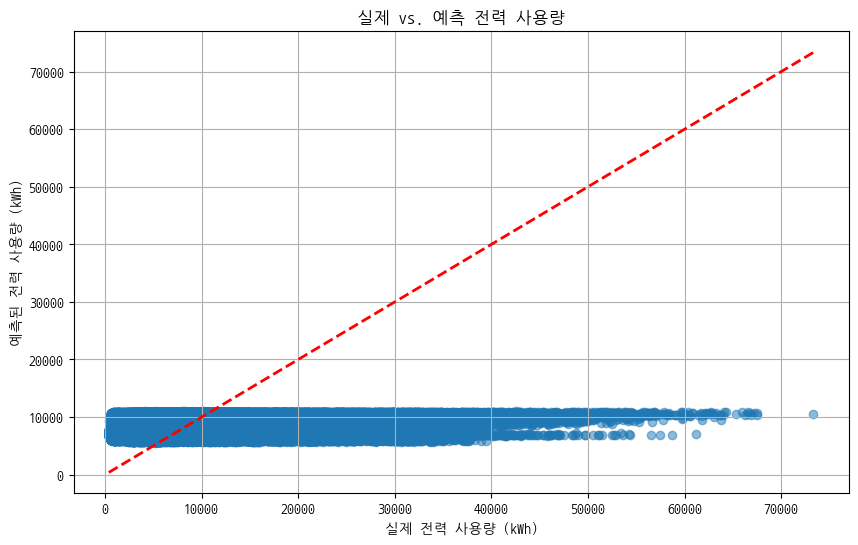

In [20]:
import matplotlib.pyplot as plt

# 실제값과 예측값을 산점도(scatter plot)로 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('실제 전력 사용량 (kWh)')
plt.ylabel('예측된 전력 사용량 (kWh)')
plt.title('실제 vs. 예측 전력 사용량')
plt.grid(True)
plt.show()

- 결론은 별로 상관관계가 없다는 것을 의미함